In [1]:
import io
import os
import nbformat
%matplotlib inline
from nbformat import current

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.style.use('seaborn-poster')

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
import pandas as pd

C:\ProgramData\Miniconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
execute_notebook('golvenfuncties_20180918.ipynb')

$v=C \cdot \sqrt{h \cdot i}$
<p>
$q = h \cdot v$ 
<p>
$q = h \cdot C \cdot \sqrt{h \cdot i}$ 
<p>
$q^2 = h^2 \cdot C^2 \cdot h \cdot i$ 
<p>
$q^2 = h^3 \cdot C^2 \cdot i$ 
<p>
${q^2}^{1/2} = {h^3}^{1/2} \cdot {C^2}^{1/2} \cdot {i}^{1/2}$ 
<p>
${q^1} = h^{3 \cdot {1/2}} \cdot {C^1} \cdot {i}^{1/2}$ 
<p>
${q} = h^{3\mathbin{/}2} \cdot {C} \cdot \sqrt{i}$
<p>
$h^{3\mathbin{/}2} = \dfrac{q}{C \cdot \sqrt{i}}$
<p>
${h^{3\mathbin{/}2}}^{\tfrac{1}{3\mathbin{/}2}} = {\dfrac{q}{C \cdot \sqrt{i}}}^{\tfrac{1}{3\mathbin{/}2}}$
<p>
$h = {\dfrac{q}{C \cdot \sqrt{i}}}^{\tfrac{1}{3\mathbin{/}2}}$
<p>
$h = {\dfrac{q}{C \cdot \sqrt{i}}}^{\tfrac{2}{3}}$

In [3]:
lengteproef = duratie_proef(2) #uur

debiet = ['q=30lms','q=170lms']
params = ['waterdiepte (m)', 'stroomsnelheid (m/s)']

columns_mi = pd.MultiIndex.from_product([debiet, params], names=['overloopdebiet', 'parameter'])

df = pd.DataFrame(index=lengteproef, data=0, columns=columns_mi)
df.index.name='tijd (seconden)'

In [4]:
periods = {
    'q=30lms': {'duratie_proef': 0.75},
    'q=170lms': {'duratie_proef': 2}
}

#### EDIT: 2018-09-18 wijziging in C waarde, nu gezet op 30 (was 10)

In [5]:
C = 30
slope = 1.8
i = np.arctan(1/slope) # i in radian

for deb in debiet:
    lengteproef_lms = duratie_proef(periods[deb]['duratie_proef'])
    q = int(deb[2:-3]) / 1000
    
    h = (q/(C*np.sqrt(i)))**(2/3)
    v = q / h 
    tau = schuifspanning4myron(v=v,d=h)
    u_3 = v**3
    
    df.loc[lengteproef_lms,(deb,'waterdiepte (m)')]=h
    df.loc[lengteproef_lms,(deb,'stroomsnelheid (m/s)')]=v    
    df.loc[lengteproef_lms,(deb,'schuifspanning (pa)')]=tau
    df.loc[lengteproef_lms,(deb,'u^3 (m3/s3)')]=u_3
    

In [6]:
df.head()

overloopdebiet          q=30lms                             q=170lms  \
parameter       waterdiepte (m) stroomsnelheid (m/s) waterdiepte (m)   
tijd (seconden)                                                        
0                       0.01254             2.392317        0.039859   
1                       0.01254             2.392317        0.039859   
2                       0.01254             2.392317        0.039859   
3                       0.01254             2.392317        0.039859   
4                       0.01254             2.392317        0.039859   

overloopdebiet                                   q=30lms              \
parameter       stroomsnelheid (m/s) schuifspanning (pa) u^3 (m3/s3)   
tijd (seconden)                                                        
0                           4.265087           153.96307    13.69166   
1                           4.265087           153.96307    13.69166   
2                           4.265087           153.96307    13.69166   
3                           4.265087           153.96307    13.69166   
4                           4.265087           153.96307    13.69166   

overloopdebiet             q=170lms              
parameter       schuifspanning (pa) u^3 (m3/s3)  
tijd (seconden)                                  
0                        332.834899   77.586071  
1                        332.834899   77.586071  
2                        332.834899   77.586071  
3                        332.834899   77.586071  
4                        332.834899   77.586071

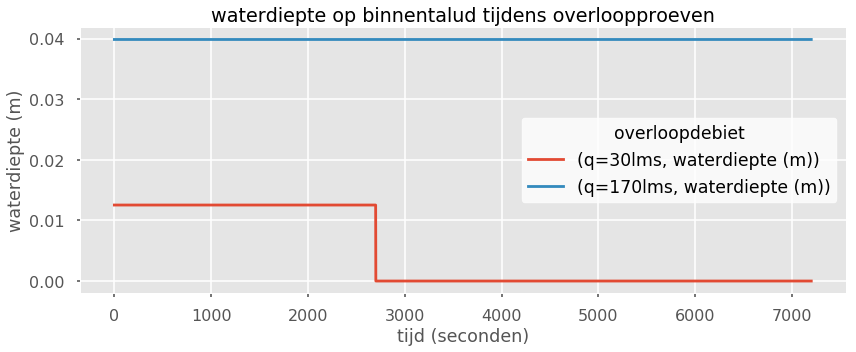

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
df.iloc[:, df.columns.get_level_values(1)=='waterdiepte (m)'].plot(ax=ax,figsize=(12,5), title='waterdiepte op binnentalud tijdens overloopproeven')
ax.set_ylabel('waterdiepte (m)')

#legend
leg = ax.legend(fontsize = 'xx-large',frameon=True)
leg.set_title(title='overloopdebiet', prop = {'size':'xx-large'})
frame = leg.get_frame()
frame.set_color('white')

#show
plt.tight_layout()
plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproef_prV_waterdiepte.png',dpi=100)
plt.show()
#df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')



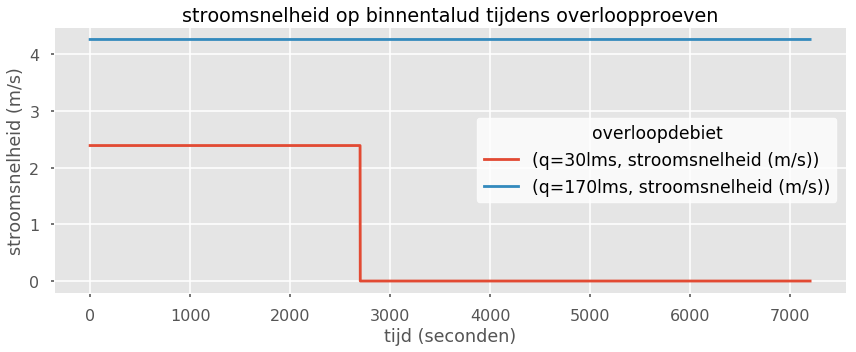

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
df.iloc[:, df.columns.get_level_values(1)=='stroomsnelheid (m/s)'].plot(ax=ax,figsize=(12,5), title='stroomsnelheid op binnentalud tijdens overloopproeven')
ax.set_ylabel('stroomsnelheid (m/s)')

#legend
leg = ax.legend(fontsize = 'xx-large',frameon=True)
leg.set_title(title='overloopdebiet', prop = {'size':'xx-large'})
frame = leg.get_frame()
frame.set_color('white')

#show
plt.tight_layout()
plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproef_prV_stroomsnelheid.png',dpi=100)
plt.show()
#df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')



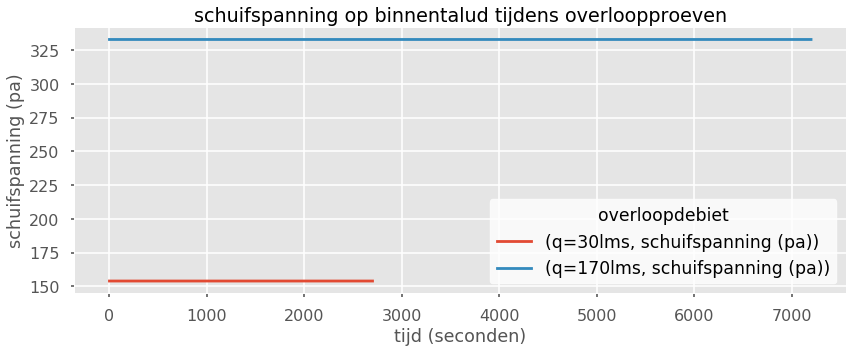

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
df.iloc[:, df.columns.get_level_values(1)=='schuifspanning (pa)'].plot(ax=ax,figsize=(12,5), title='schuifspanning op binnentalud tijdens overloopproeven')
ax.set_ylabel('schuifspanning (pa)')

#legend
leg = ax.legend(fontsize = 'xx-large',frameon=True)
leg.set_title(title='overloopdebiet', prop = {'size':'xx-large'})
frame = leg.get_frame()
frame.set_color('white')

#show
plt.tight_layout()
plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproef_prV_schuifspanning.png',dpi=100)
plt.show()
#df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')



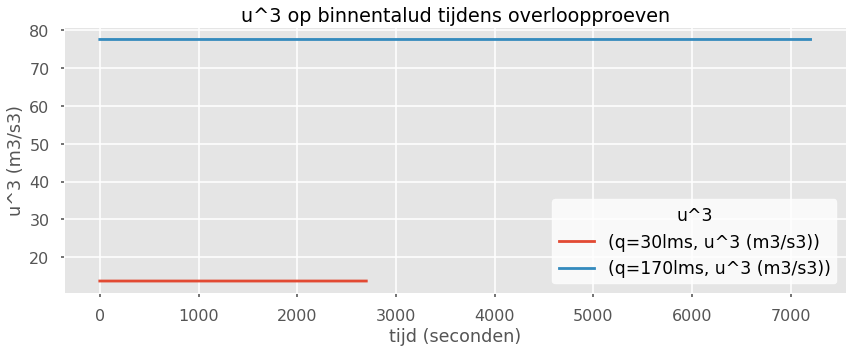

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
df.iloc[:, df.columns.get_level_values(1)=='u^3 (m3/s3)'].plot(ax=ax,figsize=(12,5), title='u^3 op binnentalud tijdens overloopproeven')
ax.set_ylabel('u^3 (m3/s3)')

#legend
leg = ax.legend(fontsize = 'xx-large',frameon=True)
leg.set_title(title='u^3', prop = {'size':'xx-large'})
frame = leg.get_frame()
frame.set_color('white')

#show
plt.tight_layout()
plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproef_prV_u3.png',dpi=100)
plt.show()
#df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')



In [11]:
for deb in debiet:
    df.iloc[:, df.columns.get_level_values(0)==deb].to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproef_prV_'+deb+'.csv')

In [12]:
df.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2018-09-18 plots//overloopproeven_prV.csv')